In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5


/Users/mac/Desktop/Programming_Stuff/Machine Learning/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.4352
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1126
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0704
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0366
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9759 - loss: 0.0805
Test accuracy: 0.979200005531311


In [7]:
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
train = pd.read_csv("/Users/mac/Desktop/Programming_Stuff/Machine Learning/Datasets/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:

test= pd.read_csv("/Users/mac/Desktop/Programming_Stuff/Machine Learning/Datasets/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

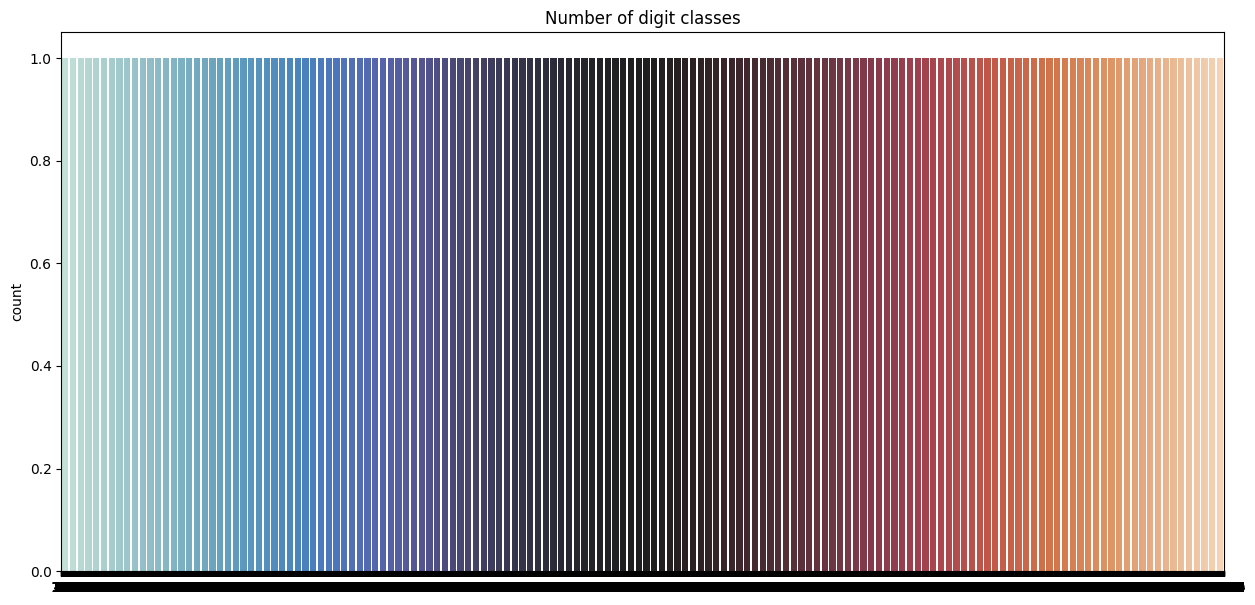

In [13]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

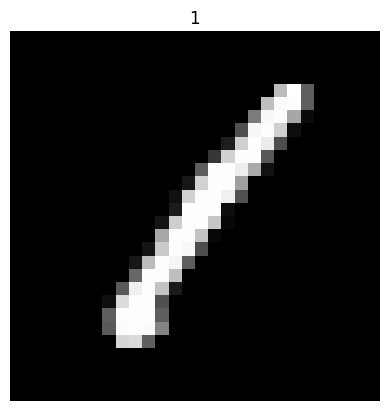

In [15]:
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

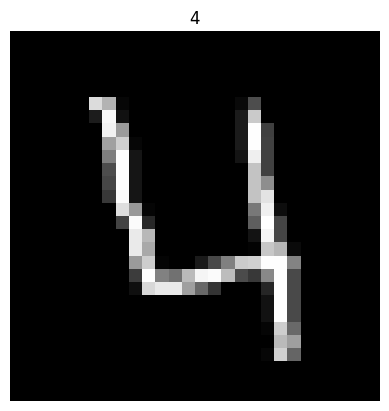

In [16]:
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [17]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [18]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [24]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10, 10)
y_test shape (4200, 10, 10)


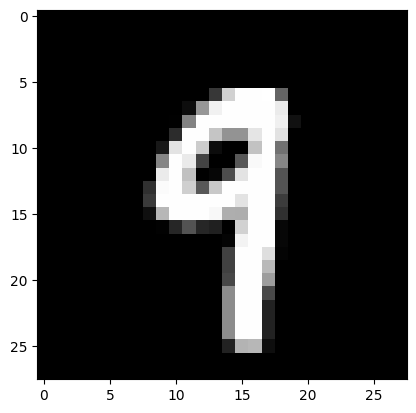

In [26]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [31]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [32]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [33]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [34]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [36]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs, 
                    validation_data=(X_val, Y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10), output.shape=(None, 10)

In [37]:
Y_train = to_categorical(Y_train, num_classes=10)  # This should give you shape (num_samples, 10)

In [42]:
print(Y_train.shape)
Y_val = to_categorical(Y_val, num_classes=10)  # Same shape as Y_train
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

(37800, 10, 10, 10)
Y_train shape: (37800, 10, 10, 10)
Y_val shape: (4200, 10, 10, 10)


In [44]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# If your labels are already flattened, no need to reshape.
# Check the shape of Y_train and Y_val
print("Original Y_train shape:", Y_train.shape)  # Should be (37800,)
print("Original Y_val shape:", Y_val.shape)      # Should be (4200,)

# If they are still incorrectly shaped, you might need to flatten them
if len(Y_train.shape) > 1:
    Y_train = np.argmax(Y_train, axis=-1)  # Convert from one-hot (3D) back to class labels (1D)
if len(Y_val.shape) > 1:
    Y_val = np.argmax(Y_val, axis=-1)  # Convert from one-hot (3D) back to class labels (1D)

# Now apply one-hot encoding
Y_train = to_categorical(Y_train, num_classes=10)  # Shape: (37800, 10)
Y_val = to_categorical(Y_val, num_classes=10)      # Shape: (4200, 10)

# Check the new shapes
print("New Y_train shape:", Y_train.shape)  # Should be (37800, 10)
print("New Y_val shape:", Y_val.shape)      # Should be (4200, 10)

# Fit the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Original Y_train shape: (37800, 10, 10, 10)
Original Y_val shape: (4200, 10, 10, 10)
New Y_train shape: (37800, 10, 10, 10)
New Y_val shape: (4200, 10, 10, 10)
Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10, 10), output.shape=(None, 10)

In [45]:
print("Original Y_train shape:", Y_train.shape)  # Should be (37800, 10, 10, 10)
print("Sample Y_train values:", Y_train[:5])  # Inspect the first few samples

Original Y_train shape: (37800, 10, 10, 10)
Sample Y_train values: [[[[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[0. 1. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 

In [46]:
import numpy as np

# Reshape Y_train from (37800, 10, 10, 10) to (37800, 10, 10)
Y_train_flat = np.argmax(Y_train, axis=-1)  # Converts to class indices
# Resulting shape: (37800, 10, 10)

# Similarly for Y_val if it has the same structure
Y_val_flat = np.argmax(Y_val, axis=-1)  # Assuming Y_val has the same shape
# Resulting shape: (4200, 10, 10)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

# Define input_shape based on your actual input data
input_shape = (10, 10, 1)  # Example shape, adjust as necessary

# Example model architecture
model = Sequential()
model.add(Flatten(input_shape=input_shape))  # Flatten the input if necessary
model.add(Dense(128, activation='relu'))      # Hidden layer
model.add(Dense(100))                          # Output layer (10 * 10 = 100)
model.add(Reshape((10, 10)))                   # Reshape to (10, 10)

# Ensure you use an appropriate loss function
model.compile(optimizer='adam', loss='categorical_crossentropy')  # Change loss function if needed

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape

# Define input_shape based on your actual input data
input_shape = (28, 28, 1)  # Adjust this to match X_train's shape

# Example model architecture
model = Sequential()
model.add(Flatten(input_shape=input_shape))  # Flatten the input to 1D
model.add(Dense(128, activation='relu'))      # Hidden layer
model.add(Dense(100))                          # Output layer (10 * 10 = 100)
model.add(Reshape((10, 10)))                   # Reshape to (10, 10)

# Compile the model with an appropriate loss function
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [52]:
# Fit the model
history = model.fit(datagen.flow(X_train, Y_train_flat, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val_flat),
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 10.9377 - val_loss: 12.0833
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 12.2139 - val_loss: 11.9975
Epoch 3/10
  5/151 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 11.9176

2024-10-08 14:31:55.788807: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 11.4559 - val_loss: 11.3172
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 11.4352 - val_loss: 11.4016
Epoch 5/10
  7/151 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 11.4371

2024-10-08 14:31:58.327305: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 11.5874 - val_loss: 10.6155
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 10.7329 - val_loss: 10.7848
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 11.4627 - val_loss: 12.5717
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 12.7048 - val_loss: 12.6124
Epoch 9/10
  8/151 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 12.7345

2024-10-08 14:32:03.545072: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 13.1061 - val_loss: 13.3830
Epoch 10/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 13.3178 - val_loss: 13.3889


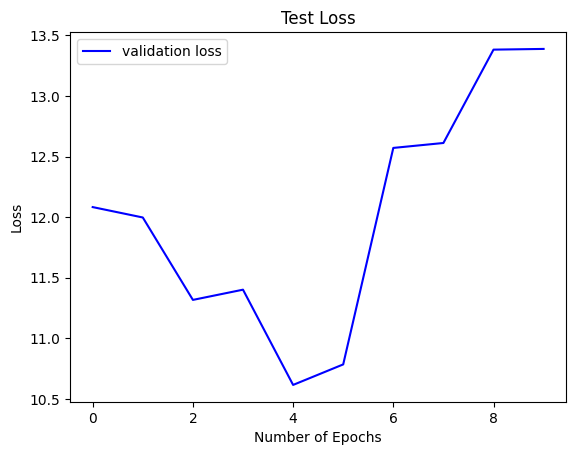

In [53]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Check the shapes of Y_pred and X_val
print(f"Y_pred shape: {Y_pred.shape}")  # Shape of predicted values
print(f"X_val shape: {X_val.shape}")    # Shape of validation data
print(f"Y_val shape: {Y_val.shape}")    # Shape of true labels

# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=-1)  # Shape should be (n_samples, 10, 10)

# Check the shape of Y_pred_classes before flattening
print(f"Y_pred_classes shape before flattening: {Y_pred_classes.shape}")

# Flatten the predictions to a single array of class labels
Y_pred_classes_flat = Y_pred_classes.flatten()

# Convert validation observations to class labels
Y_true = np.argmax(Y_val, axis=-1)  # Shape should be (n_samples, 10, 10)

# Check the shape of Y_true before flattening
print(f"Y_true shape before flattening: {Y_true.shape}")

# Flatten the true labels
Y_true_flat = Y_true.flatten()

# Check the shapes after flattening
print(f"Y_pred_classes_flat shape: {Y_pred_classes_flat.shape}")
print(f"Y_true_flat shape: {Y_true_flat.shape}")

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true_flat, Y_pred_classes_flat)

# Plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
Y_pred shape: (4200, 10, 10)
X_val shape: (4200, 28, 28, 1)
Y_val shape: (4200, 10, 10, 10)
Y_pred_classes shape before flattening: (4200, 10)
Y_true shape before flattening: (4200, 10, 10)
Y_pred_classes_flat shape: (42000,)
Y_true_flat shape: (420000,)


ValueError: Found input variables with inconsistent numbers of samples: [420000, 42000]